# IMDB data analysis- Part 7:

# The next part of this project will extract data from Box Office Mojo website, and compare with IMDB and metascore ratings data from the IMDB dataset from Part II. 

# This analysis will be broken into 2 parts. This first part will focus on data cleaning, merging the datasets, and performing some summary statistics and plots. 

# The 2nd part will examine the data in more detail, including a comparison of some plots and summary statistics with all box office revenue outliers deleted (there are more than a few notable outliers for this variable). 

# In addition, the 2nd part will implement some OLS regression models, including a multivariate model examining the association of metascores, IMDB ratings, and the number of IMDB ratings with inflation-adjusted box office revenue.

See following link for comprehensive list of domestic gross box office revenue per film among American released films.

https://www.boxofficemojo.com/alltime/adjusted.htm

Also see link for top 300 films for US box office revenues, adjusted for inflation!:
https://www.boxofficemojo.com/alltime/adjusted.htm

# Overview of code and research questions:

## Code summary: imports, cleans, and merges the 1937-2017 dataset with the Box Office Mojodataaset of the Top 300 inflation-adjusted box office earners among US-released films. Rest of notebook implements various plots, summary statistics, and answers the research questions listed below.

# Research questions: 1.) a.) Are higher box office earnings associated with higher ratings among movie critics or the general public, and/or do these films have higher average numebrs of IMDB ratings? 

# 1b.) More precisely, are average IMDB ratings, number of IMDB ratings, or metascore ratings associated with higher box office earnings, among these top 300 box office earners?  

# 2.) a.) How many films in the box office dataset were produced/distributed by each movie studio? What are the average IMDB ratings, number of IMDB ratings, and metascore ratings for each movie studio? Have these correlations changed over time?

# 3.)a.)  Are any particular movie studios performing better than others in any of these metrics? For example, which movie studio has the highest number of films among the highest box office earners? 

# 3b.) Are these differences in box office earnings statistically significant?

# 4.) a.) How many films are in box office dataset for each genre? In particular, what genres are the most represented among the top box office earners? 

# 4b.) Also, what is the average IMDB rating, number of IMDB votes, and metascores for each genre in the sample?

# Overview of Part VII:

## Various statistical methods and visualizations will be implemented, such as summary statistics (for the entire sample, but also using the groupby method to apply to specific groups, such as genre and movie studio).

## Some of the plots and visualizations will include: boxplots (to examine distributions and identify outliers); scatterplots; and regression plots (which will include an r coefficient).

## Finally, all outliers of the box office revenue data will be deleted, and all of these changes and data cleaning methods will be saved to a new CSV file. This file will be imported into the next part of this project (see below).

# Overview of Part VIII:


## Some of the plots and summary statistics will be re-implemented (including a few extra statistics and visualizations) to examine the data after the outliers have been deleted). One type of plot that will not be in Part VII includes barplots (e.g., comparisons of IMDB ratings by movie studio). 

## Some of the other statistical methods will include simple (i.e., univariate) as well as multivariate OLS regression models. This way, one can not only determine the degree of correlation between 2 or more variables, but specific magnitudes can be estimated, as well as weighted correlations between a given outcome/dependent variable (e.g., inflation-adjusted box office earnings) and various covariates/indepedent variables, such as metascores, IMDB ratings, and the number of IMDB ratings. 

## To answer some of the more nuanced questions, such as whether some movie studios earned a statistically signficant different level of box office revenue, I will also estimate indicator varables for each of the movie studio variables. These indicator variables will then be  used to estimate several additional OLS models, which can be used to compare various movie studios with a particular reference group (one at a time), which can show whether the movie studios had signficantly different box office earnings relative to a specific movie studio (e.g., Sony Pictures). 

# Import original 1936-2017 IMDB dataset (i.e., the sample with metascores)

In [166]:
import pandas as pd

imdb_data = pd.read_csv('imdb_data_1936-2017.csv')
imdb_data.head(10)

,Unnamed: 0,Unnamed: 0.1,name,year,length,genre,imdb_rating,n_votes,metascore
0,0,50,Modern Times,1936,87,Comedy,8.5,184248,96
1,1,51,Reefer Madness,1936,66,Drama,3.8,7150,70
2,2,70,Snow White and the Seven Dwarfs,1937,83,Animation,7.6,160064,95
3,3,71,A Star Is Born,1937,111,Drama,7.6,6987,77
4,4,72,Pépé le Moko,1937,94,Crime,7.7,5515,98
5,5,100,The Adventures of Robin Hood,1938,102,Action,8.0,43218,97
6,6,110,The Wizard of Oz,1939,102,Adventure,8.0,345167,100
7,7,111,Gone with the Wind,1939,238,Drama,8.2,258837,97
8,8,112,Mr. Smith Goes to Washington,1939,129,Comedy,8.2,96371,73
9,9,113,Only Angels Have Wings,1939,121,Adventure,7.7,10694,86


# Import Box Office data

In [167]:
import pandas as pd

box_office = pd.read_excel('US_top_300_box_office_inflation_adjusted.xlsx') 
box_office.head(10)

,Rank,Title (click to view),Studio,Adjusted Gross,Unadjusted Gross,Year^,Year
0,1,Gone with the Wind,MGM,1824463000,198676459,1939^,1939
1,2,Star Wars,Fox,1608419900,460998007,1977^,1977
2,3,The Sound of Music,Fox,1286641000,159287539,1965^,1965
3,4,E.T.: The Extra-Terrestrial,Uni.,1280944600,435110554,1982^,1982
4,5,Titanic,Par.,1224014800,659363944,1997^,1997
5,6,The Ten Commandments,Par.,1182930000,65500000,1956,1956
6,7,Jaws,Uni.,1156551700,260000000,1975,1975
7,8,Doctor Zhivago,MGM,1120943200,111721910,1965,1965
8,9,The Exorcist,WB,998710500,232906145,1973^,1973
9,10,Snow White and the Seven Dwarfs,Dis.,984270000,184925486,1937^,1937


In [168]:
#examine the data types for each column
box_office.dtypes

Rank                      int64
Title (click to view)    object
Studio                   object
Adjusted Gross            int64
Unadjusted Gross          int64
Year^                    object
Year                      int64
dtype: object

## Data cleaning: a.) change column name of "Title (click to view)" to name to match the same column name as the IMDB dataset;  b.) rename the ambiguous row names from the Studio column to more explicit names; and c.)  rename the year column. 

### a.) Rename column

In [169]:
#rename the Title (click to view) column to merely "name" to match IMDB dataset
box_office = box_office.rename(columns ={'Title (click to view)': 'name'})

#sanity check: check to ensure column name was correctly channged
box_office.head(10)

,Rank,name,Studio,Adjusted Gross,Unadjusted Gross,Year^,Year
0,1,Gone with the Wind,MGM,1824463000,198676459,1939^,1939
1,2,Star Wars,Fox,1608419900,460998007,1977^,1977
2,3,The Sound of Music,Fox,1286641000,159287539,1965^,1965
3,4,E.T.: The Extra-Terrestrial,Uni.,1280944600,435110554,1982^,1982
4,5,Titanic,Par.,1224014800,659363944,1997^,1997
5,6,The Ten Commandments,Par.,1182930000,65500000,1956,1956
6,7,Jaws,Uni.,1156551700,260000000,1975,1975
7,8,Doctor Zhivago,MGM,1120943200,111721910,1965,1965
8,9,The Exorcist,WB,998710500,232906145,1973^,1973
9,10,Snow White and the Seven Dwarfs,Dis.,984270000,184925486,1937^,1937


### b.) Delete unnamed columns

In [170]:
box_office = box_office.drop(columns =['Year^'])

box_office.head(10)

,Rank,name,Studio,Adjusted Gross,Unadjusted Gross,Year
0,1,Gone with the Wind,MGM,1824463000,198676459,1939
1,2,Star Wars,Fox,1608419900,460998007,1977
2,3,The Sound of Music,Fox,1286641000,159287539,1965
3,4,E.T.: The Extra-Terrestrial,Uni.,1280944600,435110554,1982
4,5,Titanic,Par.,1224014800,659363944,1997
5,6,The Ten Commandments,Par.,1182930000,65500000,1956
6,7,Jaws,Uni.,1156551700,260000000,1975
7,8,Doctor Zhivago,MGM,1120943200,111721910,1965
8,9,The Exorcist,WB,998710500,232906145,1973
9,10,Snow White and the Seven Dwarfs,Dis.,984270000,184925486,1937


## c.) Rename Studio names

In [171]:
#show all current unique values from the Studio column
box_office['Studio'].unique()

#Notice that several of the studio names are somewhat ambiguous

array(['MGM', 'Fox', 'Uni.', 'Par.', 'WB', 'Dis.', 'BV', 'AVCO', 'UA',
       'Col.', 'DW', 'Sony', 'RKO', 'NL', 'NM', 'P/DW', 'LGF', 'Selz.',
       'TriS', 'MPC', 'Orion', 'IFC', 'Sum.', 'WB (NL)', 'LG/S', 'AIP'],
      dtype=object)

In [172]:
#rename studio names by passing a dictionary to the replace() method
box_office['Studio'] = box_office['Studio'].replace({'Uni.': 'Universal', 'Dis.':'Disney', 'BV':'Buena_Vista', 'UA': ' Universal_Artists',
                             'DW':'DreamWorks', 'WB':'Warner_Bros', 'WB (NL)': 'WB_New_Line', 'LG/S': 'Lionsgate', 
                              'LGF': 'Lionsgate','AIP':'American_International', 'TriS':'TriStar', 
                              'Sum.':'Summit_Entertainment', 'Col.':'Columbia', 'Par.':'Paramount', 'NL':'New_Line',
                                                     'NM':'Newmarket','P/DW': 'DreamWorks'})

In [173]:
#sanity check: ensure the Studio names have been replaced 
box_office['Studio'].unique()

array(['MGM', 'Fox', 'Universal', 'Paramount', 'Warner_Bros', 'Disney',
       'Buena_Vista', 'AVCO', ' Universal_Artists', 'Columbia',
       'DreamWorks', 'Sony', 'RKO', 'New_Line', 'Newmarket', 'Lionsgate',
       'Selz.', 'TriStar', 'MPC', 'Orion', 'IFC', 'Summit_Entertainment',
       'WB_New_Line', 'American_International'], dtype=object)

### Rename the Year column to year so it matches the IMDB dataset

In [176]:
box_office.rename(columns = {'Year':'year'}, inplace=True)

In [177]:
#sanity check: check back one last time on the box_office dataframe
box_office.head(10)

,Rank,name,Studio,Adjusted Gross,Unadjusted Gross,year
0,1,Gone with the Wind,MGM,1824463000,198676459,1939
1,2,Star Wars,Fox,1608419900,460998007,1977
2,3,The Sound of Music,Fox,1286641000,159287539,1965
3,4,E.T.: The Extra-Terrestrial,Universal,1280944600,435110554,1982
4,5,Titanic,Paramount,1224014800,659363944,1997
5,6,The Ten Commandments,Paramount,1182930000,65500000,1956
6,7,Jaws,Universal,1156551700,260000000,1975
7,8,Doctor Zhivago,MGM,1120943200,111721910,1965
8,9,The Exorcist,Warner_Bros,998710500,232906145,1973
9,10,Snow White and the Seven Dwarfs,Disney,984270000,184925486,1937


# Merge the box office and IMDB datasets by film name/title

In [197]:
imdb_box_office = box_office.merge(imdb_data, on = 'name', how = 'inner')

imdb_box_office

,Rank,name,Studio,Adjusted Gross,Unadjusted Gross,year_x,Unnamed: 0,Unnamed: 0.1,year_y,length,genre,imdb_rating,n_votes,metascore
0,1,Gone with the Wind,MGM,1824463000,198676459,1939,7,111,1939,238,Drama,8.2,258837,97
1,3,The Sound of Music,Fox,1286641000,159287539,1965,149,1461,1965,172,Biography,8.0,177891,63
2,5,Titanic,Paramount,1224014800,659363944,1997,1115,11130,1997,194,Drama,7.8,931015,75
3,7,Jaws,Universal,1156551700,260000000,1975,298,2951,1975,124,Adventure,8.0,498728,87
4,8,Doctor Zhivago,MGM,1120943200,111721910,1965,151,1463,1965,197,Drama,8.0,63225,69
5,9,The Exorcist,Warner_Bros,998710500,232906145,1973,250,2480,1973,122,Horror,8.0,324587,82
6,10,Snow White and the Seven Dwarfs,Disney,984270000,184925486,1937,2,70,1937,83,Animation,7.6,160064,95
7,11,Star Wars: The Force Awakens,Buena_Vista,976279300,936662225,2015,1941,19390,2015,136,Action,8.0,767853,81
8,12,101 Dalmatians,Disney,902252800,144880014,1961,105,1091,1961,79,Animation,7.2,134066,83
9,12,101 Dalmatians,Disney,902252800,144880014,1961,113,1140,1961,79,Animation,7.2,134068,83


Notice the sample size is 263, so most of the 300 films from the box office dataset were merged together with that of the IMDB dataset.

However, some of the films are duplicates: e.g., 101 Dalmations.

## Data cleaning: delete the duplicate rows, delete the unnamed columns, and rename the year column

### Calculate the number of duplicate rows by using the sum() method chained to the duplicated() method

In [198]:
#calculate the number duplicates
imdb_box_office.duplicated('name').sum()

10

There are 10 duplicates, so we will still be left with a solid 253 sample size after deleting the duplicates.

## Delete the duplicate rows

In [199]:
#delete the duplicates
imdb_box_office = imdb_box_office.drop_duplicates(['name'])

imdb_box_office.head(10)

,Rank,name,Studio,Adjusted Gross,Unadjusted Gross,year_x,Unnamed: 0,Unnamed: 0.1,year_y,length,genre,imdb_rating,n_votes,metascore
0,1,Gone with the Wind,MGM,1824463000,198676459,1939,7,111,1939,238,Drama,8.2,258837,97
1,3,The Sound of Music,Fox,1286641000,159287539,1965,149,1461,1965,172,Biography,8.0,177891,63
2,5,Titanic,Paramount,1224014800,659363944,1997,1115,11130,1997,194,Drama,7.8,931015,75
3,7,Jaws,Universal,1156551700,260000000,1975,298,2951,1975,124,Adventure,8.0,498728,87
4,8,Doctor Zhivago,MGM,1120943200,111721910,1965,151,1463,1965,197,Drama,8.0,63225,69
5,9,The Exorcist,Warner_Bros,998710500,232906145,1973,250,2480,1973,122,Horror,8.0,324587,82
6,10,Snow White and the Seven Dwarfs,Disney,984270000,184925486,1937,2,70,1937,83,Animation,7.6,160064,95
7,11,Star Wars: The Force Awakens,Buena_Vista,976279300,936662225,2015,1941,19390,2015,136,Action,8.0,767853,81
8,12,101 Dalmatians,Disney,902252800,144880014,1961,105,1091,1961,79,Animation,7.2,134066,83
11,14,Ben-Hur,MGM,884940000,74000000,1959,96,992,1959,212,Adventure,8.1,197400,90


## Delete the unnamed columns

In [200]:
#delete the 2 unnamed columns: 1st put both columns in a list
cols = ['Unnamed: 0', 'Unnamed: 0.1']
#use drop method and call upon the cols list
imdb_box_office = imdb_box_office.drop(cols, axis=1)

imdb_box_office.head(10)

,Rank,name,Studio,Adjusted Gross,Unadjusted Gross,year_x,year_y,length,genre,imdb_rating,n_votes,metascore
0,1,Gone with the Wind,MGM,1824463000,198676459,1939,1939,238,Drama,8.2,258837,97
1,3,The Sound of Music,Fox,1286641000,159287539,1965,1965,172,Biography,8.0,177891,63
2,5,Titanic,Paramount,1224014800,659363944,1997,1997,194,Drama,7.8,931015,75
3,7,Jaws,Universal,1156551700,260000000,1975,1975,124,Adventure,8.0,498728,87
4,8,Doctor Zhivago,MGM,1120943200,111721910,1965,1965,197,Drama,8.0,63225,69
5,9,The Exorcist,Warner_Bros,998710500,232906145,1973,1973,122,Horror,8.0,324587,82
6,10,Snow White and the Seven Dwarfs,Disney,984270000,184925486,1937,1937,83,Animation,7.6,160064,95
7,11,Star Wars: The Force Awakens,Buena_Vista,976279300,936662225,2015,2015,136,Action,8.0,767853,81
8,12,101 Dalmatians,Disney,902252800,144880014,1961,1961,79,Animation,7.2,134066,83
11,14,Ben-Hur,MGM,884940000,74000000,1959,1959,212,Adventure,8.1,197400,90


## Rename the year column, and delete the other/redundant year column

In [183]:
#rename year column
imdb_box_office.rename(columns = {'year_x':'year'}, inplace=True)

#delete the redundant year column
imdb_box_office = imdb_box_office.drop('year_y', axis=1)

#check back on dataset
imdb_box_office.head(10)

,Rank,name,Studio,Adjusted Gross,Unadjusted Gross,year,length,genre,imdb_rating,n_votes,metascore
0,1,Gone with the Wind,MGM,1824463000,198676459,1939,238,Drama,8.2,258837,97
1,3,The Sound of Music,Fox,1286641000,159287539,1965,172,Biography,8.0,177891,63
2,5,Titanic,Paramount,1224014800,659363944,1997,194,Drama,7.8,931015,75
3,7,Jaws,Universal,1156551700,260000000,1975,124,Adventure,8.0,498728,87
4,8,Doctor Zhivago,MGM,1120943200,111721910,1965,197,Drama,8.0,63225,69
5,9,The Exorcist,Warner_Bros,998710500,232906145,1973,122,Horror,8.0,324587,82
6,10,Snow White and the Seven Dwarfs,Disney,984270000,184925486,1937,83,Animation,7.6,160064,95
7,11,Star Wars: The Force Awakens,Buena_Vista,976279300,936662225,2015,136,Action,8.0,767853,81
8,12,101 Dalmatians,Disney,902252800,144880014,1961,79,Animation,7.2,134066,83
11,14,Ben-Hur,MGM,884940000,74000000,1959,212,Adventure,8.1,197400,90


# Data exploration: examine distributions of the data: summary statistics, barplots, etc.

### Show the data types of each variable

In [184]:
#show data types of each of the columns to see if any need to be converted to integer
imdb_box_office.dtypes

Rank                  int64
name                 object
Studio               object
Adjusted Gross        int64
Unadjusted Gross      int64
year                  int64
length                int64
genre                object
imdb_rating         float64
n_votes               int64
metascore             int64
dtype: object

## Summary statistics

## Summary statistics of the qualitative variables: i..e, studio, name, and genre

In [185]:
#show the number of movie studios in the dataset
imdb_box_office.describe(include = 'object')

,name,Studio,genre
count,253,253,253
unique,253,22,10
top,You Only Live Twice,Buena_Vista,Action
freq,1,43,98


### Notice the dataset includes 22 studios, but note that some of these studios are owned by the same parent companies.

### There are 10 genres represented in the dataset, with Action films being the most represented. Thus, out of each film genre, Action films overall have pulled in the highest inflation-adjusted box office earnings. In fact, a solid 38.7% of the films in the dataset are Action films.

### Similarly, the Buena Vista movie studio has the largest number of high-grossing films, with 43 films in the dataset.

## Summary statistics of the quantitative variables

In [186]:
imdb_box_office.describe()

,Rank,Adjusted Gross,Unadjusted Gross,year,length,imdb_rating,n_votes,metascore
count,253.000000,2.530000e+02,2.530000e+02,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,155.130435,4.486369e+08,2.257425e+08,1992.881423,123.395257,7.306324,3.779048e+05,68.446640
std,85.933915,1.947446e+08,1.286692e+08,17.972029,27.107844,0.788634,3.347235e+05,15.614977
min,1.000000,2.806425e+08,2.365000e+07,1937.000000,70.000000,4.700000,1.226000e+04,28.000000
25%,83.000000,3.259957e+08,1.349664e+08,1981.000000,103.000000,6.700000,1.451450e+05,58.000000
50%,156.000000,3.890124e+08,2.092559e+08,1997.000000,121.000000,7.300000,2.845320e+05,68.000000
75%,228.000000,4.972769e+08,3.005318e+08,2007.000000,139.000000,7.900000,5.221040e+05,80.000000
max,300.000000,1.824463e+09,9.366622e+08,2017.000000,238.000000,9.200000,2.009298e+06,100.000000


# Description of summary stats:

## Right off the bat, some aspects of the statistics stand out: the range of the adjusted gross variable--i.e., inflation-adjusted box office revenue--is quite high in an absolute sense (fairly high even proportionally). 

## The standard deviation is also quite high relative to the mean, at about 79.6% of the mean. 


# Comparison of summary stats with the original IMDB 1936-2017 dataset:

## The average length of the films in this dataset is somewhat longer than that of the 1936-2017 IMDB dataset-- nearly 10 minutes longer--and the minimum value is quite a bit higher. 

## The IMDB rating is also a bit higher, but less so: 7.31 instead of 7.13. 

## Also, it's no suprise that the average number of IMDB votes is quite a bit higher than that of the original IMDB dataset, with about 170,000 more votes on average. 

## Finally, the ratio of this dataset's average metascore ratings to that of the orignal IMDB dataset is even a bit higher than the corresponding ratio of the IMDB ratings. The average metascore rating still sits at a sightly-below mediocre rating of 68.45. 

## Boxplot of adjusted gross income

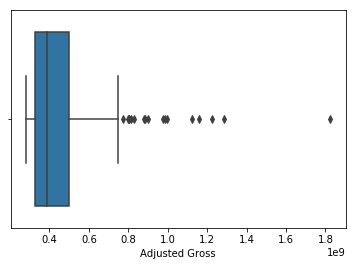

In [195]:
#import data viz libraries
import seaborn as sns

ax = sns.boxplot('Adjusted Gross', data = imdb_box_office)

### Notice there are many positive outliers, some substantially higher than the median. Outliers include observations roughly $750 million or higher.

## Examine boxplots of other main variables of interest, such as metascore and IMDB ratings

### Boxplot of metascores

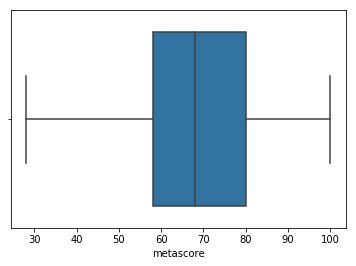

In [155]:
ax = sns.boxplot('metascore', data = imdb_box_office)

### Boxplot of IMDB ratings

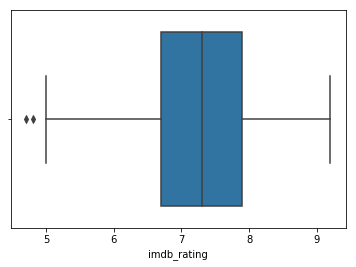

In [156]:
ax = sns.boxplot('imdb_rating', data = imdb_box_office)

### In stark contrast to the original IMDB dataset, the IMDB data that was merged for this analysis has a much more uniform distribution in terms of both metascore and IMDB ratings. There are a few outliers of IMDB ratings below the median, but they do not lie drastically outside the quartiles of the data, so we will mostly ignore them for now.

# Are higher IMDB ratings associated with higher box office earnings (inflation-adjusted)?

## Implement scatter plot of IMDB ratings and (inflation) adjusted gross box office revenues

/Users/kevinallen/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


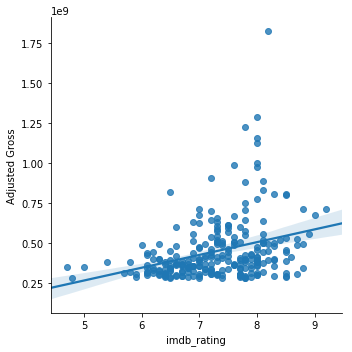

In [157]:
#import data viz libraries
import seaborn as sns

sns.lmplot(x='imdb_rating', y='Adjusted Gross', data=imdb_box_office)

# Does a higher number of IMDB votes tend to be associated with higher box office revenues?

## Scatter plot of adjusted gross box office earnings and number of IMDB votes:

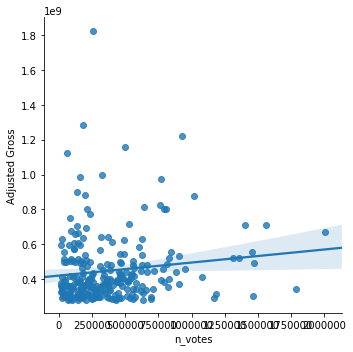

In [158]:
sns.lmplot(x='n_votes', y='Adjusted Gross', data=imdb_box_office)

# Have IMDB ratings of the films with the highest box office earnings changed over time?

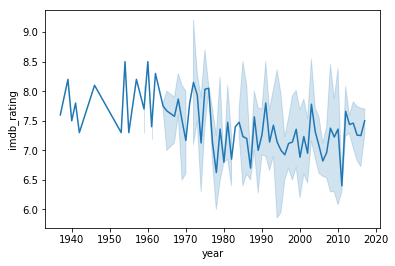

In [193]:
#lineplot of average IMDB ratings over time
sns.lineplot(x='year', y='imdb_rating', data=imdb_box_office)

### Interestingly, there is a bit of a trend over time, but it's not as strong or consistent as it was in the original IMDB dataset. Average IMDB ratings fluctuate surprisingly quite strikingly from one year to the next. However, films from the earlier decades in the dataset, particulary in the late 1930s to early 1960s have the highest average IMDB ratings. 

### Similar to the original IMDB dataset, films in the very late 1970s to early 1990s tend to have the lowest IMDB ratings. By contrast, however, films since the mid-to-late 1990s have not always had higher ratings relative to that generally-mediocre earlier period.

# Are higher metascores associated with higher box office earnings?

## Scatterplot of adjusted gross box office revenues and metascore ratings:

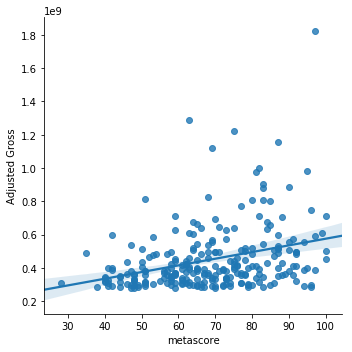

In [159]:
sns.lmplot(x='metascore', y='Adjusted Gross', data=imdb_box_office)

# Have metascore ratings of the most lucrative films changed over time?

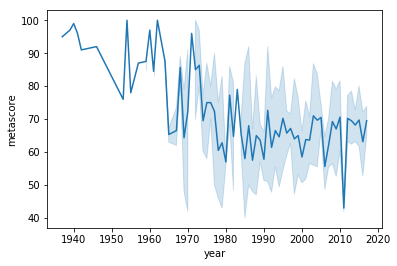

In [189]:
#lineplot of average metascore ratings over time
sns.lineplot('year', 'metascore', data=imdb_box_office)

# How has film length changed for the top-box office films over time?

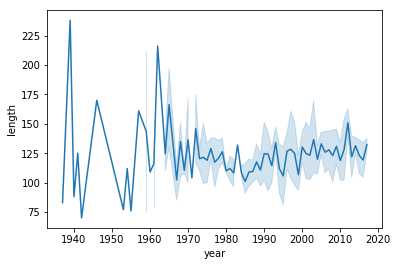

In [187]:
#average film length over time
sns.lineplot('year', 'length', data=imdb_box_office)

# Re-implement analysis after deleting outliers!

In [194]:
#show data for Adjusted Gross column
imdb_box_office['Adjusted Gross']

0      1824463000
1      1286641000
2      1224014800
3      1156551700
4      1120943200
5       998710500
6       984270000
7       976279300
8       902252800
11      884940000
12      878705500
13      827727800
14      815518000
15      804992200
16      804960000
17      799547300
18      772758700
19      749882600
20      713814300
21      712670800
22      709890100
23      705981800
25      696200000
26      675444000
27      672789500
28      665329600
30      656264800
31      642698700
33      641589900
34      637137400
          ...    
232     298555800
233     297428700
234     297339900
235     296892800
236     295952100
237     295933800
238     294786400
239     294328000
240     293900100
241     293844700
242     292586400
243     291026300
244     290956300
245     290846400
246     290595000
247     289635000
248     289042800
249     288759200
251     286988300
252     286679000
253     286024800
254     285234200
255     284795100
256     284581300
257     28

## Delete outliers

In [203]:
#delete outliers from the adjusted gross column
#start by defining an index of the range of values that need to be deleted

indexN = imdb_box_office[(imdb_box_office['Adjusted Gross'].ge(750000000))].index
                   
#drop the specified ranges of data to delete these outliers from the dataframe
imdb_box_office.drop(indexN, inplace=True)

#check back on the dataset
imdb_box_office.head(10)

,Rank,name,Studio,Adjusted Gross,Unadjusted Gross,year_x,year_y,length,genre,imdb_rating,n_votes,metascore
19,23,Fantasia,Disney,749882600,76408097,1941,1940,125,Animation,7.8,80637,96
20,24,Jurassic World,Universal,713814300,652270625,2015,2015,124,Action,7.0,526118,59
21,25,The Godfather,Paramount,712670800,134966411,1972,1972,175,Crime,9.2,1400345,100
22,26,Forrest Gump,Paramount,709890100,330252182,1994,1994,142,Drama,8.8,1560561,82
23,27,Mary Poppins,Disney,705981800,102272727,1964,1964,139,Comedy,7.8,136005,88
25,28,Grease,Paramount,696200000,189969103,1978,1978,110,Musical,7.2,203736,70
26,31,Thunderball,Universal_Artists,675444000,63595658,1965,1965,130,Action,7.0,93506,64
27,32,The Dark Knight,Warner_Bros,672789500,535234033,2008,2008,152,Action,9.0,2009298,84
28,33,The Jungle Book,Disney,665329600,141843612,1967,1967,78,Animation,7.6,147287,65
30,34,Sleeping Beauty,Disney,656264800,51600000,1959,1959,75,Animation,7.3,119347,85


# Fortunately, the sample size wasn't decreased much, since it's still 236 observations.

# Export the data to CSV to save the changes made to this merged dataset

In [215]:
imdb_box_office.to_csv('imdb_box_office_merged_metascores.csv')